# Example #16 Analysis

- Target: Si

- Process: scattering

- Description: Spin independent valence to conduction transition for \( 2x2x2 \) calculation. Example calculation for user manual.

## Packages

Processing c:\users\tanner\exceed-dm_light
  Created wheel for EXCEED-DM-light: filename=EXCEED_DM_light-1.0.0-py3-none-any.whl size=25661 sha256=e28c913a7a5f42a9871370c8eafc02a9904176cb02e49478d90cc10072454664
  Stored in directory: c:\users\tanner\appdata\local\pip\cache\wheels\61\f7\7a\72149c39ba76cb2c25cd55045a16731378d45d06e2214b92ca
Successfully built EXCEED-DM-light
  Attempting uninstall: EXCEED-DM-light
    Found existing installation: EXCEED-DM-light 1.0.0
    Uninstalling EXCEED-DM-light-1.0.0:
      Successfully uninstalled EXCEED-DM-light-1.0.0


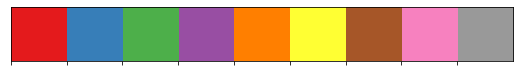

In [1]:
# Note: this line will be removed once EXCEED-DM_light can be pip installed.
! cd "C:/Users/Tanner/EXCEED-DM_light/" && python -m pip install .

import EXCEED_DM_light as exdm
import numpy as np

# %run "../../../utilities/post_analysis/plotter.ipynb"
%run "C:/Users/Tanner/Dropbox/jupyterlab_nb/plotter.ipynb"

## Data

In [2]:
data = exdm.Data('../output/EXDMout_16.hdf5')

log10_mX = np.log10(data.masses_MeV())
log10_reach_light  = np.log10(data.scatter_sigma_constraint(2.))

E_bins_LHS = data.E_bins_LHS()
log10_binned_N_E = np.log10(data.scatter_binned_rate(10.**9, 2., 
                                                    E_width = 1))

## Plots

### Reach

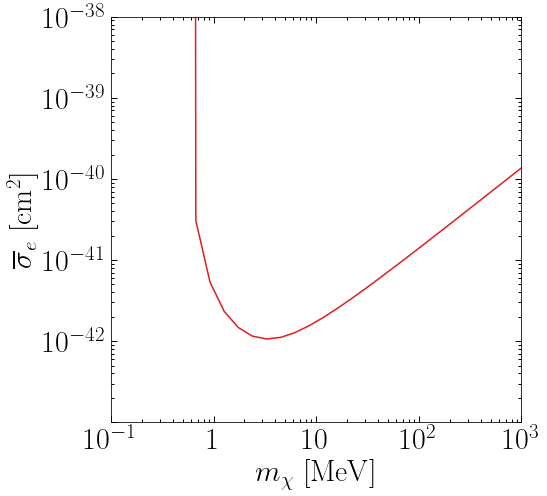

In [4]:
save_fig = True

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(7*1.1, 7))

# axes
log10_mX_min = -1
log10_mX_max = 3

log10_sigma_min = -43
log10_sigma_max = -38

set_custom_tick_options(axes)
set_custom_axes(axes, 'x', log10_mX_min, log10_mX_max,
                ax_type = 'log',
                label = r'$m_\chi$ $[\mathrm{MeV}]$')
set_custom_axes(axes, 'y', log10_sigma_min, log10_sigma_max,
                ax_type = 'log',
                label = r'$\overline{\sigma}_e$ $[ \mathrm{cm}^2 ]$',
                show_first = False)

# plot

axes.plot(
    log10_mX,
    log10_reach_light,
    color = color_list_disc[0]
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./ex_16_light_reach.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()

### Binned Rate

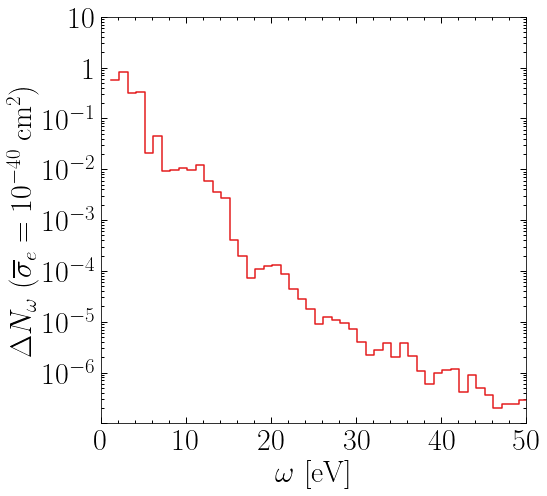

In [6]:
save_fig = True

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(7*1.1, 7))

# axes

E_min = 0
E_max = 50
dE = 10

log10_N_min = -7
log10_N_max = 1

set_custom_tick_options(axes)
set_custom_axes(axes, 'x', E_min, E_max, 
                ax_type = 'lin', 
                label = r'$\omega$ $[\mathrm{eV}]$',
                step = dE)
set_custom_axes(axes, 'y', log10_N_min, log10_N_max, 
                ax_type = 'log', 
                label = r'$\Delta N_\omega \; (\overline{\sigma}_e = 10^{-40} \; \mathrm{cm}^2)$',
                show_first = False)

# plot

axes.step(
    E_bins_LHS,
    log10_binned_N_E,
    where = 'post',
    color = color_list_disc[0]
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./ex_16_light_binned_N.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()